
# <span style="color:rgb(213,80,0)">The <samp>out</samp> structure returned by CLASSIX</span>

The <samp>classix.m</samp> function has three output parameters: <samp>label, explain, out</samp>. The first one, the vector <samp>label</samp>, contains the cluster label of each data point. The second parameter is a function handle to the explain functionality of CLASSIX. It provides us with textual and visual explanations of the performed clustering.


Here we focus on the third output parameter <samp>out</samp>. Let's load a dataset from [2], run CLASSIX, and inspect this parameter.


In [1]:
addpath ..
load('../data/Banknote.mat')
data = (data - mean(data))./std(data); % z-normalization
tic
[label, explain, out] = classix(data,0.21,41);
out

out = 
      t1_prepare: 0.0097
    t2_aggregate: 0.0144
        t3_merge: 0.0487
       t4_minPts: 0.0087
     t5_finalize: 0.0218
              cs: [2x1 double]
            dist: 26710
              gc: [291x1 double]
             scl: 1.6773


Let's have a look at these fields. First, we see five fields correponding to the runtimes of each of CLASSIX's five computational phases (in seconds). These are:

-  **t1_prepare:** The initial data preparation, which mainly comprises data scaling and the computation of the first two principal axes.
-  **t2_aggregate:** This phase aggregates all data points into groups determined by the <samp>radius</samp> parameter of CLASSIX.
-  **t3_merge:** The computed groups will be merged into clusters when their group centers (so-called *starting points* ) are sufficiently close.
-  **t4_minPts:** Clusters with fewer than <samp>minPts</samp> points will be dissolved into their groups, and each of the groups will then be reassigned to a large enough cluster.
-  **t5_finalize:** This is mainly cleanup, generating the <samp>out</samp> structure and the function handle to <samp>explain()</samp>.

Next up is the field <samp>out.cs</samp>, which stores the number of points in each cluster.


In [2]:
out.cs

ans = 2x1    
   757
   615


The field <samp>out.dist</samp> corresponds to the number of distance calculations between data points that have been performed in the aggregation phase. We would like this number to be small. Usually, a larger <samp>radius</samp> parameter will lead to a smaller <samp>out.dist</samp>, but also coarser clusters. If CLASSIX's aggregation phase takes very long, this is usually reflected in a large number of distance calculations. Try increasing <samp>radius</samp> in this case.


In [3]:
out.dist

ans = 26710


In this case, we have performed 26,710 distance computations. This is way below the maximum of 1372^2 = 941,192 distance computations that would be required by brute-force. As there are 1372 data points, on average every data point has been involved in 26710/1372 = 19.5 distance computations.


The <samp>out.gc</samp> parameter gives us the indices of the group centers in the original data. Here are the first five:


In [4]:
out.gc(1:5)

ans = 5x1    
   598
   328
   561
   203
    29


So, <samp>data(598,:)</samp> is the center of group 1, <samp>data(328,:)</samp> is the center of group 2, etc.


We can use this information to translate the group paths printed out by <samp>explain(ind1,ind2)</samp> into the indices of our data. Here is an example. Say we want to explain why data points 800 and 801 ended up in the same cluster. Then we simply call:


Data point 800 is in group 154, which was merged into cluster #2.
Data point 801 is in group 191, which was merged into cluster #2.
A path of overlapping groups with step size <= 1.5*R = 0.53 is:
 154 -> 166 -> 185 -> 191
(Note that with data having more than 2 features, the two
 group circles in the plot may appear bigger than they are.)


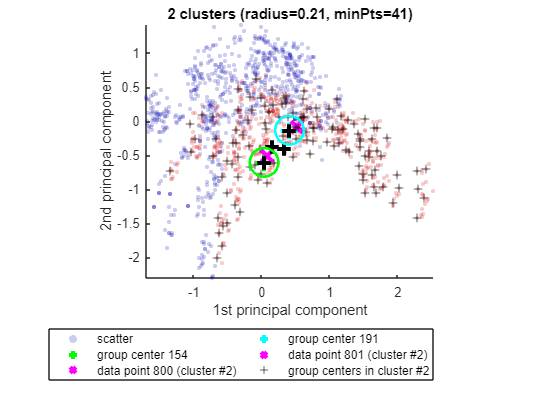

In [5]:
explain(800,801)


We see that data point 800 (say, <samp>p1</samp>) is in group 154. Let's get the corresponding group center and calculate the distance between the two points.


In [6]:
p1 = data(800,:);
group_center1 = data(out.gc(154),:);
norm(p1 - group_center1)

ans = 0.1996


The distance between these is 0.1996 and this is smaller than R = 0.21*1.68 = 0.35, which is why <samp>p1</samp> is in that group 154. (The scaling parameter 1.68 is explained below.)


According to the explain output, there is path of overlapping groups <samp>154 -> 166 -> 185 -> 191</samp> which brings us to point 801 (say, <samp>p2</samp>). These four groups are overlapping, which in CLASSIX means that their group centers are at most 1.5*R = 1.5*0.35 = 0.525 apart. Let's confirm this:


In [7]:
[ norm(data(out.gc(154,:)) - data(out.gc(166,:))) ,
  norm(data(out.gc(166,:)) - data(out.gc(185,:))) ,
  norm(data(out.gc(185,:)) - data(out.gc(191,:))) ]

ans = 3x1    
    0.1897
    0.1175
    0.3140


Finally, let's understand why the actual group radius is R = 0.21*1.68 = 0.35. Here, 0.21 is the radius we have chosen as input and 1.68 is a scaling parameter that CLASSIX has chosen. It can be accessed via:


In [8]:
out.scl

ans = 1.6773


This parameter is determined as follows. When CLASSIX is called, it will first mean-center all data points, and then scale them so that 50% of the data is within the unit ball. In code, this would be:


In [9]:
data = data - mean(data,1);
scl = median(vecnorm(data,2,2));
data = data/scl;
disp(scl)

1.6773


There are two reasons for this scaling: (i) it makes the clustering invariant to scaling and shifting of the data, and (ii) it makes choosing the radius parameter easier. As 50% of the data are in the unit ball, <samp>radius=1</samp> "roughly" corresponds to grouping the data into two groups. (This would be exactly the case if the center of the first group would be the origin, which usually isn't the case.)

## Learn more about CLASSIX?

CLASSIX is a fast and memory-efficient clustering algorithm which produces explainable results. If you'd like to learn more, here are a couple of online resources:

-  arXiv paper: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456)
-  Python code: [https://github.com/nla-group/classix](https://github.com/nla-group/classix)
-  MATLAB code: [https://github.com/nla-group/classix-matlab/](https://github.com/nla-group/classix-matlab/)
-  YouTube video: [https://www.youtube.com/watch?v=K94zgRjFEYo](https://www.youtube.com/watch?v=K94zgRjFEYo)
## References

[1] X. Chen and S. Güttel. "Fast and explainable clustering based on sorting." arXiv: [https://arxiv.org/abs/2202.01456](https://arxiv.org/abs/2202.01456), 2022.


[2] D. Dua and C. Graff. "UCI machine learning repository." URL: [http://archive.ics.uci.edu/ml](http://archive.ics.uci.edu/ml), 2017.

